In [801]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [802]:
df=pd.read_excel("C:/Users/dell/Desktop/ml-projects/flight_price_prediction/Flight Dataset/Data_Train.xlsx")

In [803]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [804]:
df.sample(6)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2863,IndiGo,24/06/2019,Delhi,Cochin,DEL → BOM → COK,17:10,01:30 25 Jun,8h 20m,1 stop,No info,5684
8473,Air India,21/06/2019,Mumbai,Hyderabad,BOM → HYD,15:00,16:25,1h 25m,non-stop,No info,3100
2289,Air India,6/03/2019,Delhi,Cochin,DEL → COK,14:10,17:10,3h,non-stop,No info,7931
7543,Jet Airways,1/05/2019,Banglore,Delhi,BLR → DEL,11:10,14:05,2h 55m,non-stop,No info,7229
3443,IndiGo,3/03/2019,Mumbai,Hyderabad,BOM → HYD,19:05,20:30,1h 25m,non-stop,No info,5755
3020,GoAir,21/05/2019,Kolkata,Banglore,CCU → AMD → BLR,16:40,00:15 22 May,7h 35m,1 stop,No info,8855


In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [806]:
df.drop(columns=["Route"],inplace=True)

In [807]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [808]:
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":1})

C:\Users\dell\AppData\Local\Temp\ipykernel_7952\1161096004.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":1})


In [809]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,No info,12648


In [810]:
def new(x):
    
    if x=="New Delhi":
        return "Delhi"
    
    else:
        return x
    
df["Destination"]=df["Destination"].apply(new)
df["Source"]=df["Source"].apply(new)

In [811]:
df["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

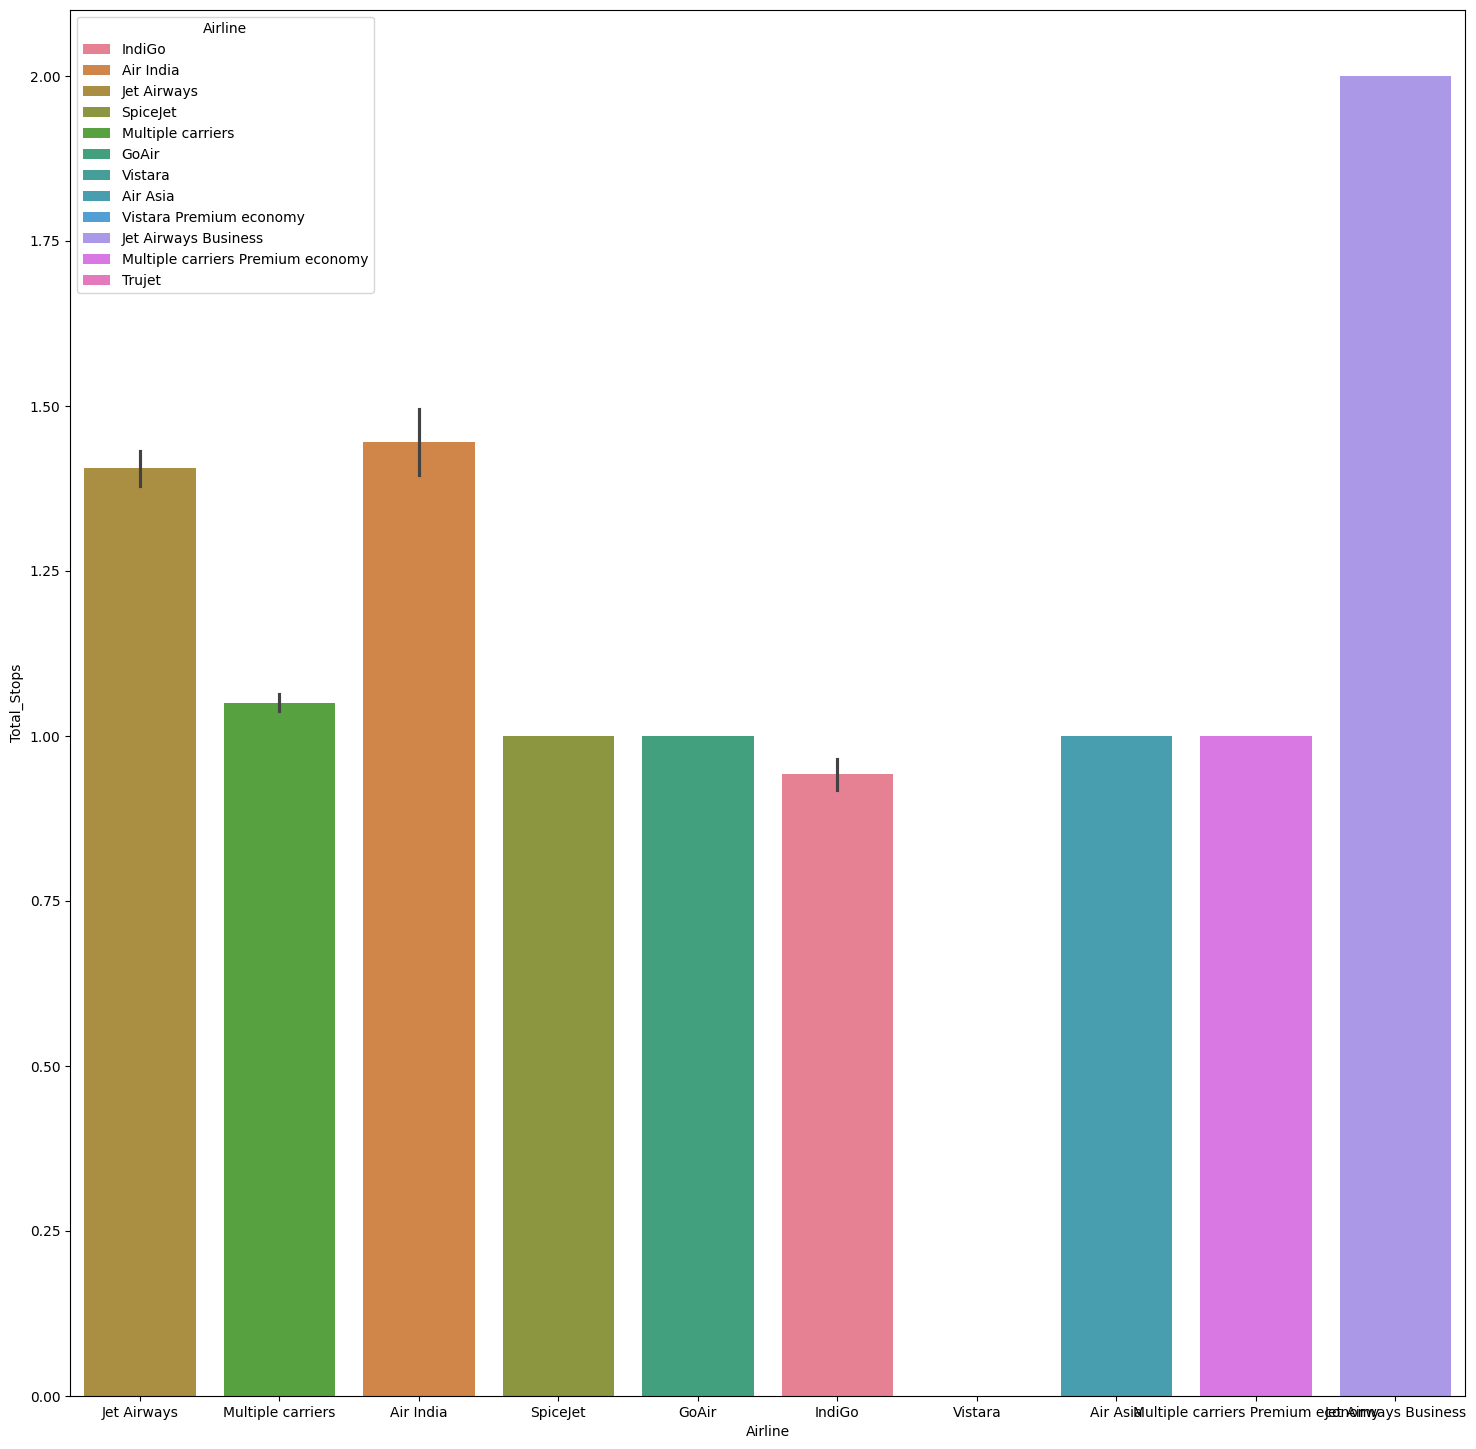

In [812]:
plt.figure(figsize=(18,18))
sns.barplot(x=df[(df["Source"]=="Delhi") & (df["Destination"]=="Cochin")]["Airline"],y=df[(df["Source"]=="Delhi") & (df["Destination"]=="Cochin")]["Total_Stops"],hue=df["Airline"])
plt.show()

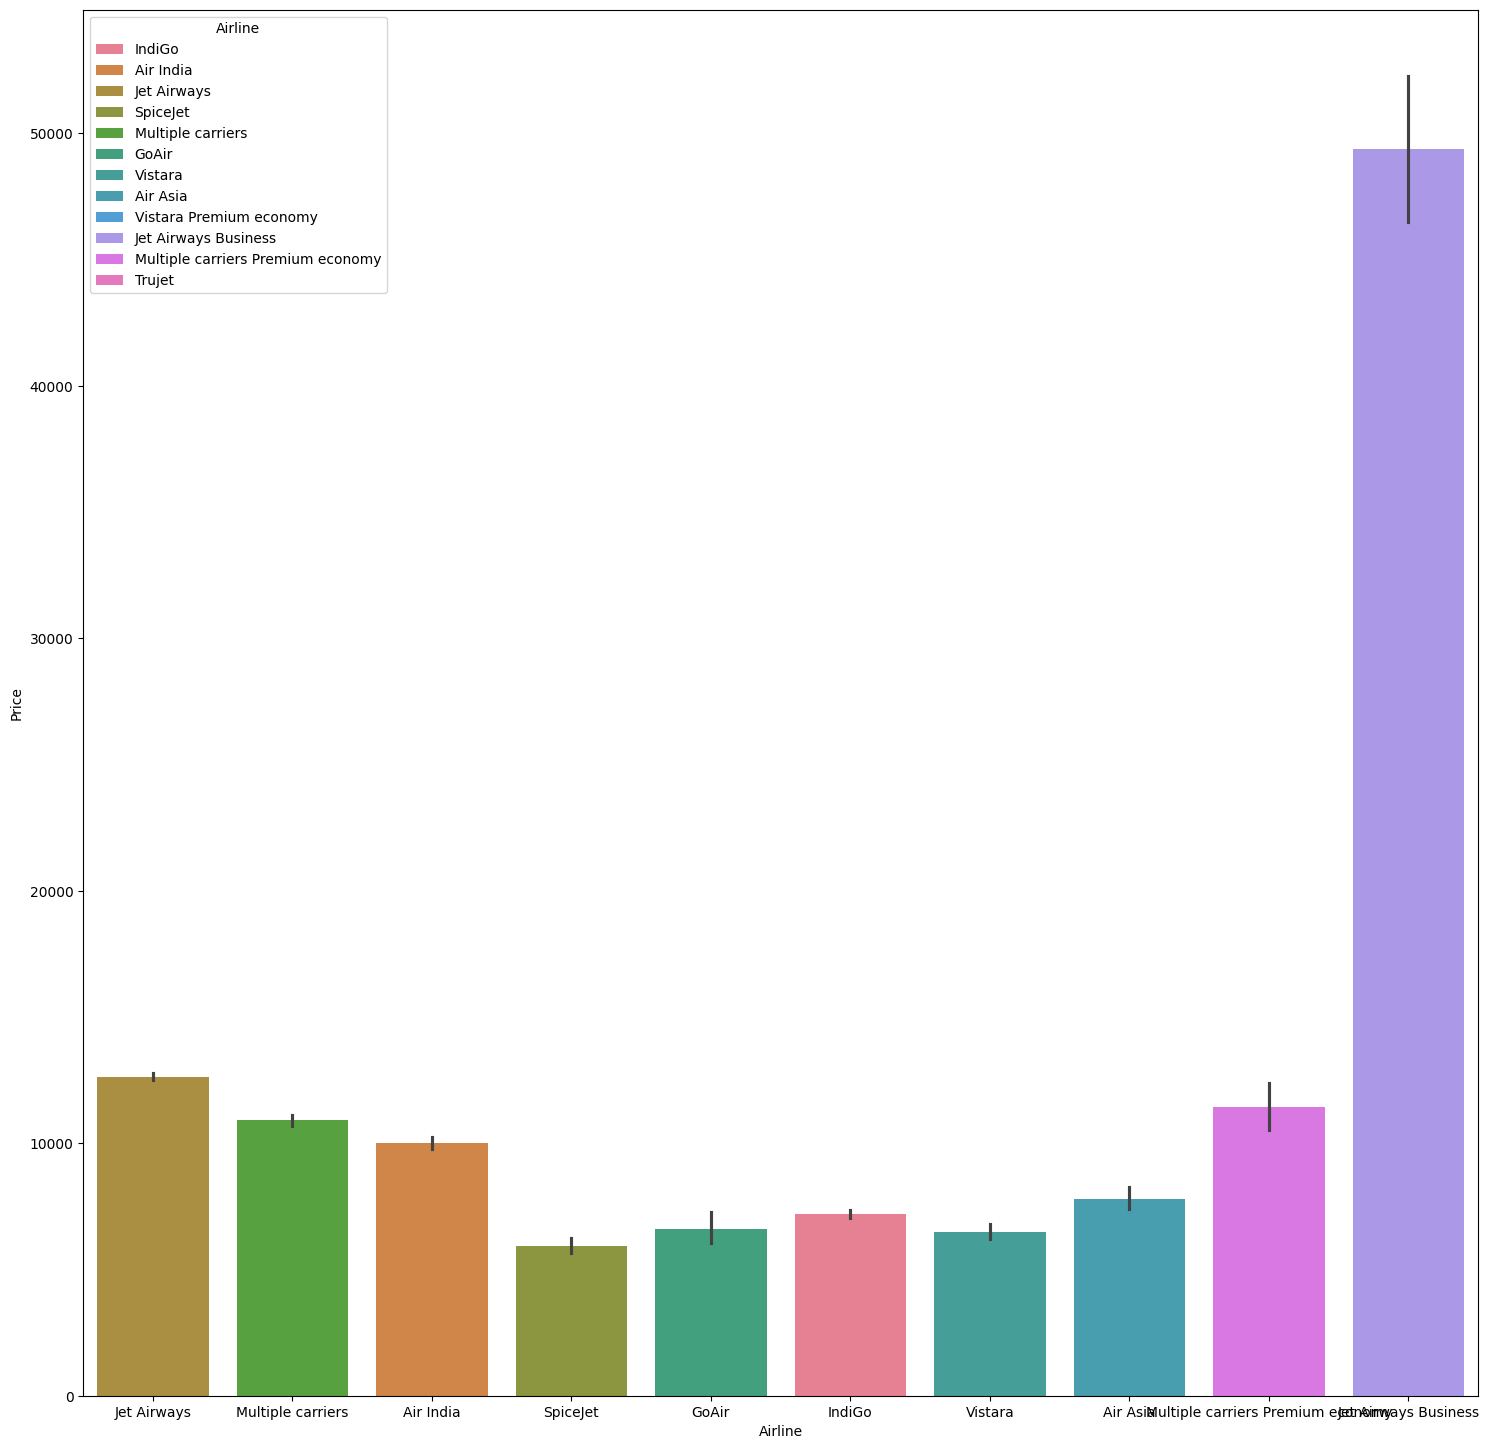

In [813]:
plt.figure(figsize=(18,18))
sns.barplot(x=df[(df["Source"]=="Delhi") & (df["Destination"]=="Cochin")]["Airline"],y=df[(df["Source"]=="Delhi") & (df["Destination"]=="Cochin")]["Price"],hue=df["Airline"])
plt.show()

In [814]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,0.0,No info,12648


In [815]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

df.drop('Date_of_Journey',inplace=True,axis=1)

df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218,12,5
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1.0,No info,13302,1,3


In [817]:
df.drop(columns=["Additional_Info"],inplace=True)

In [818]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_7952\1302972749.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\dell\AppData\Local\Temp\ipykernel_7952\1302972749.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
C:\Users\dell\AppData\Local\Temp\ipykernel_7952\1302972749.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\dell\AppData\Local\Temp\ipykernel_7952\1302972749.py:6: UserW

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,2h 50m,0.0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,4h 45m,1.0,13302,1,3,16,50,21,35


In [819]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,2h 50m,0.0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,4h 45m,1.0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0.0,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0.0,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0.0,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,2h 40m,0.0,12648,1,3,11,30,14,10


In [820]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

    
df['Duration_hours'] = duration_hour
df['Duration_mins'] = duration_min
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,4,45


In [821]:
df["Total_Stops"].value_counts()

Total_Stops
1.0    5626
0.0    3491
2.0    1520
3.0      45
Name: count, dtype: int64

In [822]:
df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [823]:
from sklearn.compose import ColumnTransformer

In [824]:
from sklearn.preprocessing import OneHotEncoder

In [825]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,4,45


In [826]:
df.iloc[0,0]

'IndiGo'

In [827]:
from sklearn.preprocessing import StandardScaler

In [828]:
from sklearn.impute import SimpleImputer

In [829]:
trf1=ColumnTransformer(
    [
         ("ohe_Airline",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[0,1,2]),
        ("impute_stop",SimpleImputer(strategy="most_frequent"),[3]),
        ("scaling",StandardScaler(),[4])
       
        
    ],remainder="passthrough"
)

In [830]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [831]:
X

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,0.0,1,3,11,30,14,10,2,40


In [832]:
X=trf1.fit_transform(X)

In [833]:
X.shape

(10683, 31)

In [834]:
from sklearn.model_selection import train_test_split

In [835]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [836]:
from sklearn.ensemble import RandomForestRegressor

In [837]:
rfr=RandomForestRegressor()

In [838]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [839]:
pred=rfr.predict(X_test)

In [840]:
from sklearn.metrics import r2_score

In [841]:
print('r2 score: ',r2_score(y_test,pred))

r2 score:  0.7827547284259316


In [842]:
from sklearn.model_selection import RandomizedSearchCV 

In [843]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [798]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=15,
                      n_estimators=300)

In [799]:
prediction = rf_random.predict(X_test)

In [800]:
print('r2 score: ', r2_score(y_test,prediction))

r2 score:  0.6451635085877582


As my observation,its better to use all columns as every column is having a good impact on output

from my analysis,by removing the date of journey,arrival and depature time,the accuracy iam getting is 64%.

As you know flights prices will change with every single day and it even also changes with 
time of flight on that particular day.

so its better to use that columns also for better accuracy.

In [854]:
import pickle